Projeto de classificação de empresas com base em suas características financeiras usando Árvores de Decisão e Florestas Aleatórias, iremos selecionar variáveis financeiras relevantes que possam refletir o desempenho das empresas. Aqui estão as variáveis sugeridas e o objetivo do modelo:

## Variáveis Selecionadas
**Capitalização de Mercado:** Representa o valor de mercado total das ações da empresa. É um indicador importante do tamanho e da estabilidade da empresa.

**Volume de Negociações:** Refere-se ao número total de ações negociadas em um período. Um volume alto pode indicar interesse elevado dos investidores.

**Preço das Ações:** O valor atual das ações da empresa no mercado. Mudanças nos preços das ações podem refletir a percepção do mercado sobre o desempenho da empresa.

**Dividendos Pagos:** Indica a parcela do lucro que é distribuída aos acionistas. Empresas com dividendos consistentes podem ser vistas como mais estáveis.

**Lucro Líquido:** O lucro total da empresa após a dedução de todas as despesas. É um indicador direto da rentabilidade da empresa.

## Objetivo do Modelo
**Classificar Empresas:** O objetivo é classificar as empresas em categorias de desempenho, como "Alto Desempenho", "Desempenho Moderado" e "Baixo Desempenho", com base nas variáveis financeiras selecionadas. Isso pode ajudar investidores a identificar empresas potencialmente lucrativas ou arriscadas.

**Entender Fatores Influenciadores:** O modelo também pode ajudar a identificar quais variáveis têm maior influência no desempenho das empresas, fornecendo insights valiosos para estratégias de investimento.

# Implementação do Modelo
Coleta de Dados: Reúna dados históricos das empresas listadas na bolsa de valores referentes às variáveis selecionadas.

Pré-processamento de Dados: Limpeza dos dados, tratamento de valores ausentes, e normalização ou padronização, se necessário.

Definição de Categorias de Desempenho: Defina critérios claros para categorizar as empresas (por exemplo, baseando-se no retorno do investimento, crescimento do preço das ações, etc.).

Construção do Modelo: Utilize Árvores de Decisão e Florestas Aleatórias para construir o modelo de classificação.

Avaliação do Modelo: Utilize métricas como precisão, recall e F1-score para avaliar o desempenho do modelo. A validação cruzada pode ser usada para garantir a generalização do modelo.

Análise de Importância de Variáveis: Use o modelo para identificar quais variáveis têm maior impacto na classificação do desempenho das empresas.

Interpretação e Conclusões: Interprete os resultados do modelo e faça recomendações com base nas descobertas.

### Instala e importa bibliotecas

In [1]:
import yfinance as yf
import concurrent.futures
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Classes, funções e definições

In [2]:
class HistoricalDataFetcher:
    def __init__(self, tickers, max_threads=4):
        self.tickers = tickers
        self.max_threads = max_threads

    def get_historical_data(self, ticker):
        stock = yf.Ticker(ticker)
        data = stock.history(period="10y")  # Obter dados dos últimos 5 anos
        data['Ticker'] = ticker  # Adicionar uma coluna para identificar o ticker
        return data

    def fetch_data(self):
        all_data = []

        with concurrent.futures.ThreadPoolExecutor(self.max_threads) as executor:
            # Mapear a função para obter os dados históricos em todos os tickers
            results = list(tqdm(executor.map(self.get_historical_data, self.tickers), total=len(self.tickers)))

        # Combina todos os DataFrames em um único DataFrame
        for data in results:
            all_data.append(data)

        return pd.concat(all_data)

### Importa dados da B3

In [3]:
tickers_b3 = [
    "HAPV3.SA","BBDC4.SA","ITSA4.SA","PETR4.SA","B3SA3.SA","RAIZ4.SA","ABEV3.SA","LREN3.SA",
    "CMIG4.SA","IFCM3.SA","CPLE6.SA","ITUB4.SA","GOAU4.SA","PETZ3.SA","COGN3.SA","PRIO3.SA",
    "AZUL4.SA","RAIL3.SA","VALE3.SA","CIEL3.SA","MRFG3.SA","LWSA3.SA","USIM5.SA","BBAS3.SA",
    "GGBR4.SA","CRFB3.SA","JBSS3.SA","SOMA3.SA","CVCB3.SA","ASAI3.SA","MRVE3.SA","VBBR3.SA",
    "AMER3.SA","PDGR3.SA","CSNA3.SA","PETR3.SA","RRRP3.SA","WEGE3.SA","BEEF3.SA","CMIG3.SA",
    "NTCO3.SA","ENEV3.SA","SLCE3.SA","TIMS3.SA","GOLL4.SA","ELET3.SA","EQTL3.SA","BBDC3.SA",
    "HBSA3.SA","EMBR3.SA","CSAN3.SA","AERI3.SA","SUZB3.SA","OIBR3.SA","BBSE3.SA","VAMO3.SA",
    "RADL3.SA","BRFS3.SA","RENT3.SA","UGPA3.SA","PCAR3.SA","BRKM5.SA","CMIN3.SA","BMGB4.SA",
    "FLRY3.SA","CCRO3.SA","RDOR3.SA","QUAL3.SA","ANIM3.SA","GMAT3.SA","HYPE3.SA","SEQL3.SA",
    "CYRE3.SA","RECV3.SA","POMO4.SA","CPLE3.SA","ECOR3.SA","CPFE3.SA","TOTS3.SA","LJQQ3.SA",
    "BRAP4.SA","DXCO3.SA","SAPR4.SA","VIVT3.SA","BPAN4.SA","SMTO3.SA","AURE3.SA","CBAV3.SA",
    "VIVA3.SA","CEAB3.SA","SBSP3.SA","YDUQ3.SA","TTEN3.SA","RAPT4.SA","ONCO3.SA","VVEO3.SA",
    "CXSE3.SA","ALPA4.SA","RCSL4.SA","MULT3.SA","JHSF3.SA","TRPL4.SA","MBLY3.SA","IRBR3.SA",
    "STBP3.SA","ENAT3.SA","CURY3.SA","SIMH3.SA","AESB3.SA","EGIE3.SA","ARZZ3.SA","MOVI3.SA",
    "KLBN4.SA","CASH3.SA","AZEV4.SA","PSSA3.SA","ELET6.SA","DIRR3.SA","TRAD3.SA","SBFG3.SA",
    "CSMG3.SA","GUAR3.SA","AMBP3.SA","SMFT3.SA","MLAS3.SA","TEND3.SA","INTB3.SA","RCSL3.SA",
    "GGPS3.SA","BRSR6.SA","EZTC3.SA","MDIA3.SA","KEPL3.SA","ODPV3.SA","MTRE3.SA","SEER3.SA",
    "NEOE3.SA","KRSA3.SA","GFSA3.SA","POSI3.SA","MYPK3.SA","ITUB3.SA","TRIS3.SA","GRND3.SA",
    "PGMN3.SA","PLPL3.SA","EVEN3.SA","MEAL3.SA","ESPA3.SA","CAML3.SA","PTBL3.SA","TGMA3.SA",
    "RANI3.SA","AZEV3.SA","LIGT3.SA","WIZC3.SA","KLBN3.SA","LAVV3.SA","ZAMP3.SA","SGPS3.SA",
    "USIM3.SA","FRAS3.SA","LEVE3.SA","AGRO3.SA","ORVR3.SA","ABCB4.SA","NGRD3.SA","TUPY3.SA",
    "HBOR3.SA","CLSA3.SA","VLID3.SA","AMAR3.SA","JALL3.SA","MDNE3.SA","ENJU3.SA","MGLU3.SA",
    "MATD3.SA","VIVR3.SA","HBRE3.SA","SAPR3.SA","MILS3.SA","ETER3.SA","CSED3.SA","SHUL4.SA",
    "ARML3.SA","VULC3.SA","TASA4.SA","BMOB3.SA","FIQE3.SA","CTNM4.SA","OPCT3.SA","PINE4.SA",
    "NINJ3.SA","BLAU3.SA","PFRM3.SA","DASA3.SA","UNIP6.SA","SYNE3.SA","ALLD3.SA","LOGG3.SA",
    "PORT3.SA","ITSA3.SA","ROMI3.SA","PNVL3.SA","TAEE4.SA","LUPA3.SA","BRIT3.SA","MELK3.SA",
    "VITT3.SA","IGTI3.SA","IGTI3.SA","ALPK3.SA","SHOW3.SA","FESA4.SA","JSLG3.SA","TECN3.SA",
    "RNEW4.SA","TCSA3.SA","CTSA4.SA","LPSB3.SA","SOJA3.SA","RNEW3.SA","ELMD3.SA","DESK3.SA",
    "POMO3.SA","AALR3.SA","CTSA3.SA","EUCA4.SA","DEXP3.SA","DOTZ3.SA","JFEN3.SA",
    "TAEE3.SA","INEP4.SA","CAMB3.SA","PRNR3.SA","WEST3.SA","BRAP3.SA","LAND3.SA","GOAU3.SA",
    "PDTC3.SA","LOGN3.SA","COCE5.SA","TFCO4.SA","VSTE3.SA","SANB3.SA","RSID3.SA","DMVF3.SA",
    "SANB4.SA","GGBR3.SA","ALUP4.SA","INEP3.SA","CSUD3.SA","SCAR3.SA","AGXY3.SA","APER3.SA",
    "BRKM3.SA","EALT4.SA","IGTI4.SA","IGTI4.SA","TPIS3.SA","WHRL3.SA","ATMP3.SA","BOBR4.SA",
    "ALUP3.SA","CGRA4.SA","SNSY5.SA","ATOM3.SA","RDNI3.SA","CEBR6.SA","BMEB4.SA","PMAM3.SA",
    "TASA3.SA","EPAR3.SA","BEES3.SA","ENGI3.SA","TEKA4.SA","RAPT3.SA","LVTC3.SA","UCAS3.SA",
    "CEBR5.SA","WHRL4.SA","UNIP3.SA","PTNT3.SA","MTSA4.SA","BAHI3.SA","BPAC5.SA","BIOM3.SA",
    "OIBR4.SA","HAGA4.SA","CGRA3.SA","ENGI4.SA","CEBR3.SA","PTNT4.SA","NUTR3.SA","OSXB3.SA",
    "BPAC3.SA","DEXP4.SA","REDE3.SA","NEXP3.SA","TRPL3.SA","OFSA3.SA","CGAS5.SA","ENMT3.SA",
    "FHER3.SA","CLSC4.SA","BEES4.SA","EQPA3.SA","MWET4.SA","BRSR3.SA","AVLL3.SA","RPAD6.SA",
    "EMAE4.SA","CEED4.SA","TELB4.SA","RPMG3.SA","CRPG5.SA","BAZA3.SA","CRPG6.SA","DOHL4.SA",
    "EUCA3.SA","BMEB3.SA","HAGA3.SA","BGIP4.SA","FRTA3.SA","RSUL4.SA","MNPR3.SA","BSLI4.SA",
    "CEDO4.SA","CEED3.SA","TELB3.SA","SNSY3.SA","EKTR4.SA","BRIV4.SA","ALPA3.SA","CTNM3.SA",
    "BAUH4.SA","BALM4.SA","BDLL4.SA","GEPA4.SA","FRIO3.SA","WLMM4.SA","CTKA4.SA","AFLT3.SA",
    "CLSC3.SA","CEEB3.SA","BSLI3.SA","MGEL4.SA","PLAS3.SA","CRIV4.SA","DTCY3.SA","NORD3.SA",
    "BMKS3.SA","FIEI3.SA","MRSA3B.SA","EALT3.SA","MNDL3.SA","LAME4.SA",
    "HOOT4.SA","UNIP5.SA","PATI3.SA","CEDO3.SA","MRSA5B.SA","BMIN4.SA","BNBR3.SA",
    "LIPR3.SA","CSAB4.SA","PEAB3.SA","EQMA3B.SA","BMIN3.SA","LUXM4.SA","BRKM6.SA","BDLL3.SA",
    "BRGE8.SA","RPAD3.SA","HETA4.SA","CRIV3.SA","BRGE6.SA","ENMT4.SA","MERC4.SA","CGAS3.SA",
    "CSRN3.SA","GEPA3.SA","CALI3.SA","CTKA3.SA","BRIV3.SA","JOPA3.SA","WLMM3.SA","BALM3.SA",
    "AHEB3.SA","BRSR5.SA","BRGE11.SA","DOHL3.SA","RPAD5.SA","FESA3.SA","CBEE3.SA","BRGE3.SA",
    "MAPT4.SA","ESTR4.SA","GSHP3.SA","CSAB3.SA","CPLE5.SA","CSRN6.SA","MOAR3.SA","EQPA7.SA",
    "CRPG3.SA","BRGE12.SA","MEGA3.SA","EQPA5.SA","HBTS5.SA","BGIP3.SA","DMFN3.SA","CEEB5.SA",
    "CSRN5.SA","BRGE5.SA","TKNO4.SA","ELET5.SA","SOND6.SA","SOND5.SA","GPAR3.SA","SQIA3.SA",
    "ESTR3.SA","BRGE7.SA","MRSA6B.SA","ALSO3.SA","BRPR3.SA","PATI4.SA","MTSA3.SA","SLED4.SA",
    "SLED3.SA","EQPA6.SA","AHEB6.SA","PINE3.SA","VIIA3.SA","EKTR3.SA","MWET3.SA","USIM6.SA",
    "AHEB5.SA","ENBR3.SA","BOAS3.SA","PEAB4.SA","COCE3.SA","JOPA4.SA","MODL3.SA","MERC3.SA",
    "CEGR3.SA","MAPT3.SA","CRDE3.SA","IGBR3.SA","MSPA4.SA","ODER4.SA","PARD3.SA","CASN3.SA",
    "BRML3.SA","DMMO3.SA","GETT3.SA","GETT4.SA","WIZS3.SA","LLIS3.SA","MSPA3.SA","MMAQ4.SA",
    "SULA4.SA","SULA3.SA","CEPE5.SA","TCNO4.SA","TCNO3.SA","CEPE6.SA","BKBR3.SA","MTIG4.SA",
    "BLUT4.SA","BLUT3.SA","MODL4.SA","CARD3.SA","SHUL3.SA","FIGE3.SA","FNCN3.SA","TEKA3.SA",
    "HETA3.SA","LCAM3.SA","BIDI4.SA","BIDI3.SA","EEEL4.SA","EEEL3.SA","BBRK3.SA","SOND3.SA",
    "CESP6.SA","CESP3.SA","CESP5.SA","ECPR4.SA","MOSI3.SA","POWE3.SA","ECPR3.SA","GNDI3.SA",
    "LAME3.SA","OMGE3.SA","IGTA3.SA","JPSA3.SA","BRDT3.SA","JBDU4.SA","JBDU3.SA","CTSA8.SA",
    "HGTX3.SA","CCPR3.SA","DTEX3.SA","VVAR3.SA","PNVL4.SA","TESA3.SA","BTOW3.SA","LINX3.SA",
    "BTTL3.SA","GPCP3.SA","GPCP4.SA","SMLS3.SA","MMXM3.SA","BSEV3.SA","CNTO3.SA","TIET4.SA",
    "TIET3.SA","CORR4.SA","CEPE3.SA","CALI4.SA","SNSY6.SA","CASN4.SA","EMAE3.SA","BPAR3.SA",
    "APTI4.SA","VSPT3.SA","MTIG3.SA","FIGE4.SA","LUXM3.SA","TKNO3.SA","COCE6.SA","MGEL3.SA",
]

In [4]:
error_tickers = [
    "LAME4.SA", "VIIA3.SA", "ENBR3.SA", "BOAS3.SA", "CRDE3.SA", "MODL3.SA", "PARD3.SA",
    "BRML3.SA", "GETT3.SA", "DMMO3.SA", "GETT4.SA", "WIZS3.SA", "LLIS3.SA", "SULA3.SA",
    "TCNO4.SA", "SULA4.SA", "TCNO3.SA", "CEPE5.SA", "BLUT4.SA", "MTIG4.SA", "CEPE6.SA",
    "BKBR3.SA", "BLUT3.SA", "CARD3.SA", "MODL4.SA", "BIDI4.SA", "BIDI3.SA", "FNCN3.SA",
    "LCAM3.SA", "BBRK3.SA", "EEEL3.SA", "EEEL4.SA", "CESP6.SA", "CESP5.SA", "MOSI3.SA",
    "CESP3.SA", "LAME3.SA", "POWE3.SA", "GNDI3.SA", "OMGE3.SA", "JBDU4.SA", "BRDT3.SA",
    "IGTA3.SA", "JPSA3.SA", "CTSA8.SA", "JBDU3.SA", "CCPR3.SA", "DTEX3.SA", "HGTX3.SA",
    "PNVL4.SA", "VVAR3.SA", "TESA3.SA", "BTOW3.SA", "LINX3.SA", "BTTL3.SA", "SMLS3.SA",
    "GPCP3.SA", "GPCP4.SA", "MMXM3.SA", "TIET4.SA", "CNTO3.SA", "BSEV3.SA", "CALI4.SA",
    "TIET3.SA", "CEPE3.SA", "APTI4.SA", "BPAR3.SA"
]

In [5]:
remaining_tickers = [ticker for ticker in tickers_b3 if ticker not in error_tickers]

In [6]:
fetcher = HistoricalDataFetcher(remaining_tickers)
df = fetcher.fetch_data()

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:58<00:00,  7.89it/s]


In [7]:
numero_de_valores_unicos = df['Ticker'].nunique()

### Prepara dados

In [8]:
# Preenchimento de valores ausentes
df.fillna(df.mean(numeric_only=True), inplace=True)

# Feature Engineering
df['Daily Change'] = df['Close'] - df['Open']
df['Daily Percent Change'] = df['Daily Change'] / df['Open'] * 100
df['5-day Moving Average'] = df['Close'].rolling(window=5).mean()

# Tratamento de valores infinitos
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Preenchimento de valores ausentes novamente após a substituição de infinitos
df.fillna(df.mean(numeric_only=True), inplace=True)

# Criação da coluna 'Categoria de Desempenho' (exemplo baseado na média do 'Daily Percent Change')
# Ajuste os critérios conforme necessário
mean_daily_percent_change = df.groupby('Ticker')['Daily Percent Change'].transform('mean')
df['Categoria de Desempenho'] = pd.qcut(mean_daily_percent_change, 3, labels=['Baixo Desempenho', 'Desempenho Moderado', 'Alto Desempenho'])

# Normalização das variáveis
scaler = StandardScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains', 'Daily Change', 'Daily Percent Change', '5-day Moving Average']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Divisão do dataset em conjuntos de treino e teste
X = df[columns_to_scale]
y = df['Categoria de Desempenho']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Aplica Modelo

In [9]:
# Modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Modelo de Floresta Aleatória
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Avaliação do Modelo

In [11]:
# Avaliação do modelo de Árvore de Decisão
tree_pred = tree_model.predict(X_test)
print("Árvore de Decisão - Relatório de Classificação:\n", classification_report(y_test, tree_pred))

# Avaliação do modelo de Floresta Aleatória
forest_pred = forest_model.predict(X_test)
print("Floresta Aleatória - Relatório de Classificação:\n", classification_report(y_test, forest_pred))

Árvore de Decisão - Relatório de Classificação:
                      precision    recall  f1-score   support

    Alto Desempenho       0.70      0.71      0.70     97368
   Baixo Desempenho       0.64      0.63      0.64     98259
Desempenho Moderado       0.65      0.65      0.65     98267

           accuracy                           0.66    293894
          macro avg       0.66      0.66      0.66    293894
       weighted avg       0.66      0.66      0.66    293894

Floresta Aleatória - Relatório de Classificação:
                      precision    recall  f1-score   support

    Alto Desempenho       0.79      0.78      0.78     97368
   Baixo Desempenho       0.69      0.79      0.73     98259
Desempenho Moderado       0.76      0.66      0.71     98267

           accuracy                           0.74    293894
          macro avg       0.75      0.74      0.74    293894
       weighted avg       0.75      0.74      0.74    293894



### Análise de Importância de Variáveis

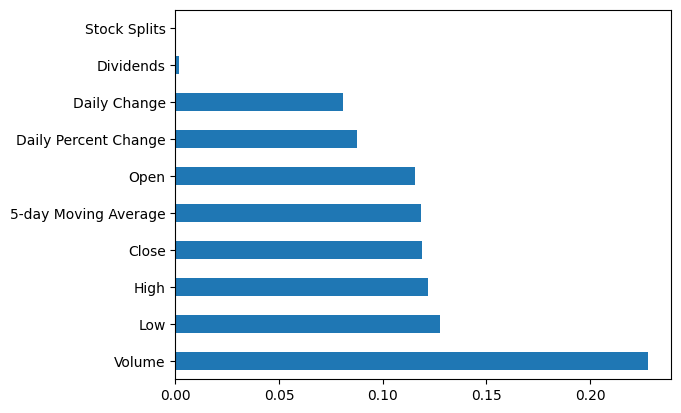

In [12]:
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Mostrar as 10 variáveis mais importantes
plt.show()

### Verifica Overfitting

In [13]:
# Avaliação do modelo no conjunto de treino
tree_train_pred = tree_model.predict(X_train)
forest_train_pred = forest_model.predict(X_train)

print("Árvore de Decisão - Treino - Relatório de Classificação:\n", classification_report(y_train, tree_train_pred))
print("Floresta Aleatória - Treino - Relatório de Classificação:\n", classification_report(y_train, forest_train_pred))

Árvore de Decisão - Treino - Relatório de Classificação:
                      precision    recall  f1-score   support

    Alto Desempenho       0.99      0.99      0.99    226712
   Baixo Desempenho       1.00      1.00      1.00    230553
Desempenho Moderado       0.99      0.99      0.99    228485

           accuracy                           1.00    685750
          macro avg       1.00      1.00      1.00    685750
       weighted avg       1.00      1.00      1.00    685750

Floresta Aleatória - Treino - Relatório de Classificação:
                      precision    recall  f1-score   support

    Alto Desempenho       0.99      0.99      0.99    226712
   Baixo Desempenho       1.00      1.00      1.00    230553
Desempenho Moderado       0.99      1.00      0.99    228485

           accuracy                           1.00    685750
          macro avg       1.00      1.00      1.00    685750
       weighted avg       1.00      1.00      1.00    685750



### Ajuste de Hiperparâmetros

In [14]:
# # ajuste de hiperparâmetros para a Floresta Aleatória
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

### Validação Cruzada

In [15]:
# # Validação cruzada para a Floresta Aleatória
# cross_val_scores = cross_val_score(forest_model, X, y, cv=5)
# print("Validação Cruzada - Scores:", cross_val_scores)

### Salva resultados

In [18]:
# df.reset_index(inplace=True)
# df.to_parquet('model_data.parquet', compression='snappy')

### Coloca resultados

In [2]:
df = pd.read_parquet('model_data.parquet')

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Adj Close,Capital Gains,Daily Change,Daily Percent Change,5-day Moving Average,Categoria de Desempenho
0,2018-04-26 00:00:00-03:00,-0.044144,-0.044000,-0.044700,-0.044389,3.163920,-0.002798,-0.002066,HAPV3.SA,NaN,0.0,-0.004446,-1.217464,0.000000,Desempenho Moderado
1,2018-04-27 00:00:00-03:00,-0.044346,-0.044118,-0.044633,-0.044356,1.377255,-0.002798,-0.002066,HAPV3.SA,NaN,0.0,0.003158,0.012064,0.000000,Desempenho Moderado
2,2018-04-30 00:00:00-03:00,-0.044374,-0.044245,-0.044623,-0.044427,0.397766,-0.002798,-0.002066,HAPV3.SA,NaN,0.0,0.001793,-0.217607,0.000000,Desempenho Moderado
3,2018-05-02 00:00:00-03:00,-0.044544,-0.044255,-0.044735,-0.044495,0.498830,-0.002798,-0.002066,HAPV3.SA,NaN,0.0,0.005108,0.350974,0.000000,Desempenho Moderado
4,2018-05-03 00:00:00-03:00,-0.044522,-0.044265,-0.044776,-0.044459,1.130436,-0.002798,-0.002066,HAPV3.SA,NaN,0.0,0.005563,0.428223,-0.044538,Desempenho Moderado


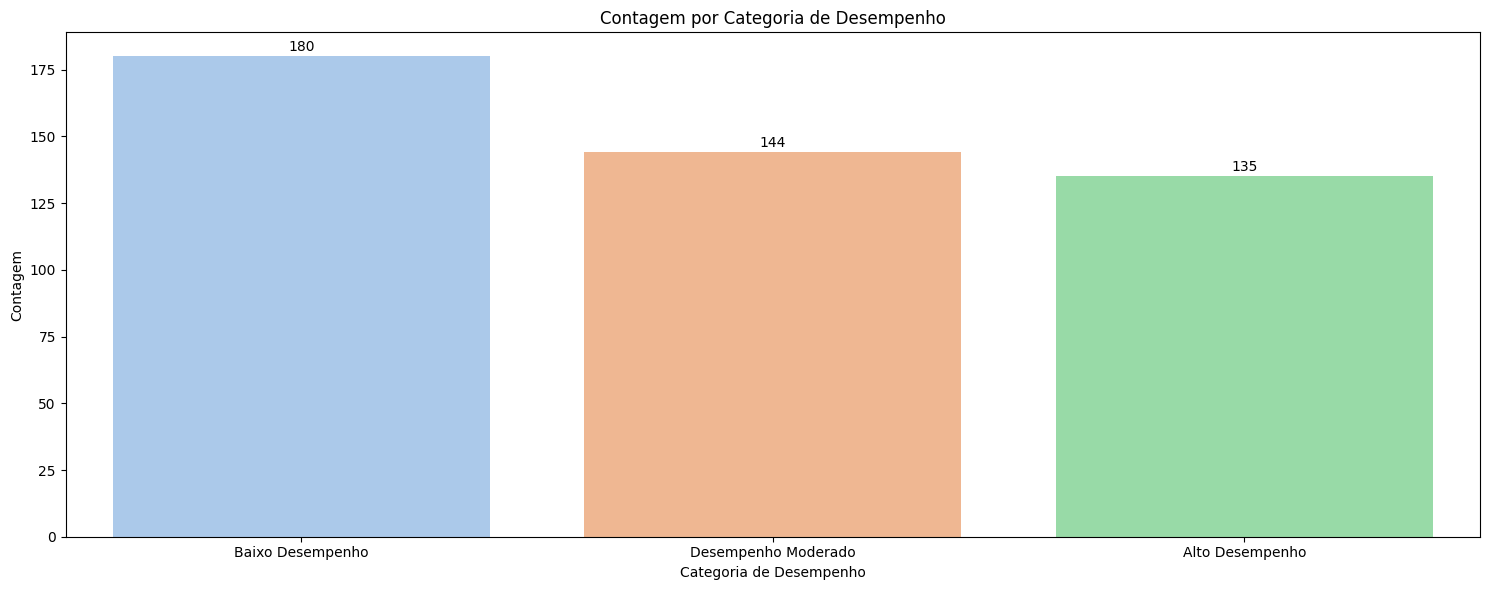

In [20]:
# Contando o número de ocorrências para cada categoria de desempenho
df_tickers = df.drop_duplicates(subset=['Ticker'])
categoria_counts = df_tickers['Categoria de Desempenho'].value_counts().reset_index()
categoria_counts.columns = ['Categoria de Desempenho', 'Contagem']

# Criando o gráfico de barras
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x="Categoria de Desempenho das Empresas", y="Contagem", data=categoria_counts, palette="pastel")
plt.title("Contagem por Categoria de Desempenho")
plt.xlabel("Categoria de Desempenho")
plt.ylabel("Contagem")
plt.xticks(rotation=0)

# Adicionando o valor no topo de cada coluna
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 7), 
                     textcoords = 'offset points')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [22]:
df_analysis = pd.DataFrame(df)
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])

# Gráfico para Daily Change
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.lineplot(x='Date', y='Daily Change', data=df_analysis, marker='o', color='blue')
plt.title('Daily Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Change')

# Gráfico para Daily Percent Change
plt.subplot(1, 3, 2)
sns.lineplot(x='Date', y='Daily Percent Change', data=df_analysis, marker='o', color='green')
plt.title('Daily Percent Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Percent Change')

# Gráfico para 5-day Moving Average
plt.subplot(1, 3, 3)
sns.lineplot(x='Date', y='5-day Moving Average', data=df_analysis, marker='o', color='red')
plt.title('5-day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('5-day Moving Average')

plt.tight_layout()
plt.show()